# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


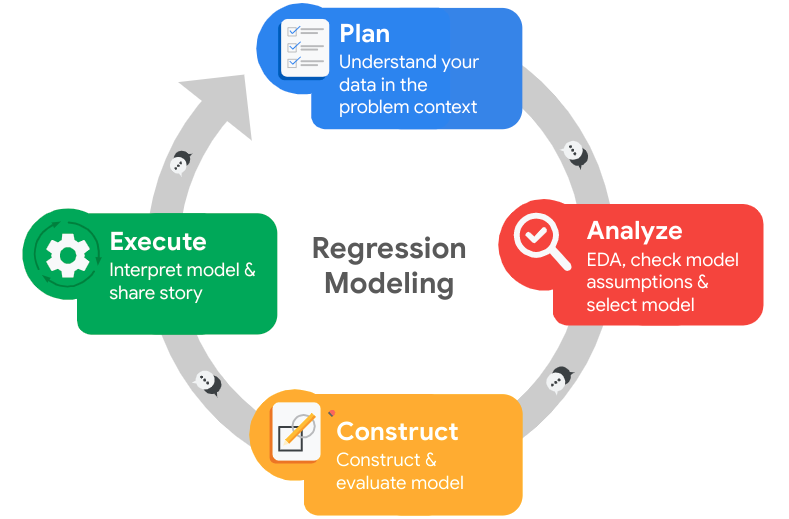

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage?
- Do you have any ethical considerations in this stage?




1) Stakeholders for this are the leadership team at Salifort Motors and their employees.  
2) We are trying to create a model that will predict if an employee will leave the company.  
3) Not much missing data, some duplicates not too many outliers.  
4) Pandas and Sklearn python libraries.   
5) The model must not be based on any personal information and the decisions made by the model cannot lead to biased decisions being made against certain individuals.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [4]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree
from sklearn.utils import resample

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [5]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [6]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [7]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [8]:
# Display all column names
### YOUR CODE HERE ###
df0 = df0.rename(columns={"average_montly_hours": "average_monthly_hours",
                    "time_spend_company": "time_spent_at_company",
                    "Work_accident": "work_accident",
                    "Department": "department"})

In [9]:
# Rename columns as needed
### YOUR CODE HERE ###


# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spent_at_company', 'work_accident',
       'left', 'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [10]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spent_at_company    0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [11]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [12]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spent_at_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [13]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spent_at_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

<Axes: xlabel='time_spent_at_company'>

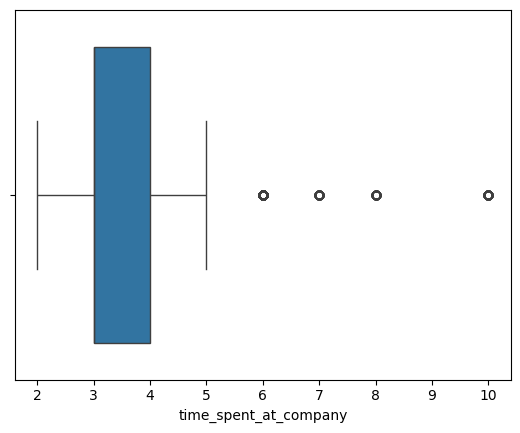

In [14]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
sns.boxplot(x=df1['time_spent_at_company'])


In [15]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
df1[df1['time_spent_at_company'] > 5]


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spent_at_company,work_accident,left,promotion_last_5years,department,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
17,0.78,0.99,4,255,6,0,1,0,sales,low
34,0.84,0.87,4,246,6,0,1,0,hr,low
47,0.57,0.70,3,273,6,0,1,0,support,low
67,0.90,0.98,4,264,6,0,1,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
11994,0.22,0.94,3,193,10,0,0,1,management,high
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1) There is clear relationship between hours worked and people leaving as well as some relationship between a low evaluation score and the employee leaving.  
2) Most people work between 150 and 250 hours and there are much less people on a high salary than low or medium.  
3) Currently none as they would not provide additional insights.  
4) To ensure that ceratin assumptions can be met for some models and that the data is clean and ready for modelling.   
5) Visualisation python libaraies such as pyplot and seaborn.   
6) The model needs to not be biased against a certain group and the data must be ethically obtained.  

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [16]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
df1['left'].value_counts()
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(f'{(10000 / 11991) * 100:.2f}%')

83.40%


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [17]:
df1['salary'].value_counts()

salary
low       5740
medium    5261
high       990
Name: count, dtype: int64

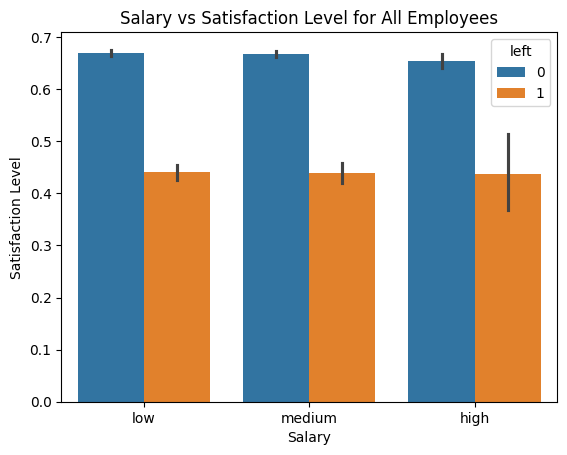

In [18]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.barplot(data=df1, x='salary' ,y='satisfaction_level', hue='left')
plt.title('Salary vs Satisfaction Level for All Employees')
plt.xlabel('Salary')
plt.ylabel('Satisfaction Level')
plt.show()

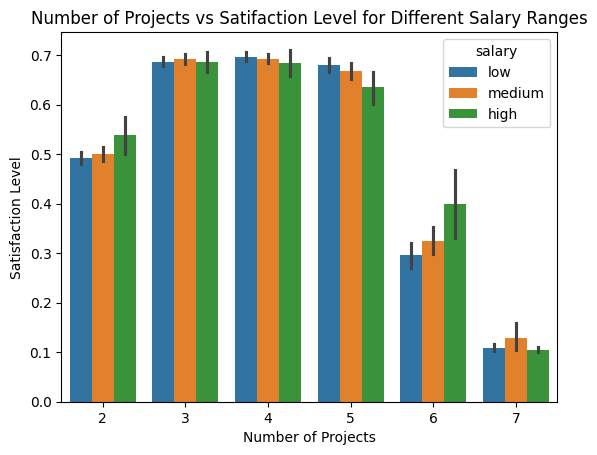

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.barplot(data=df1, x='number_project', y='satisfaction_level', hue='salary')
plt.title("Number of Projects vs Satifaction Level for Different Salary Ranges")
plt.xlabel('Number of Projects')
plt.ylabel('Satisfaction Level')
plt.show()

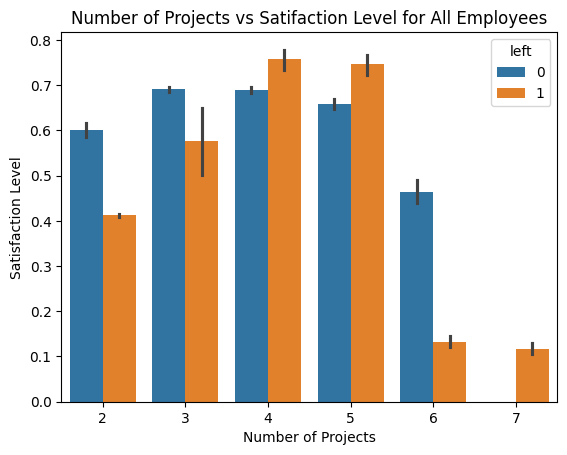

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.barplot(data=df1, x='number_project', y='satisfaction_level', hue='left')
plt.title("Number of Projects vs Satifaction Level for All Employees")
plt.xlabel('Number of Projects')
plt.ylabel('Satisfaction Level')
plt.show()

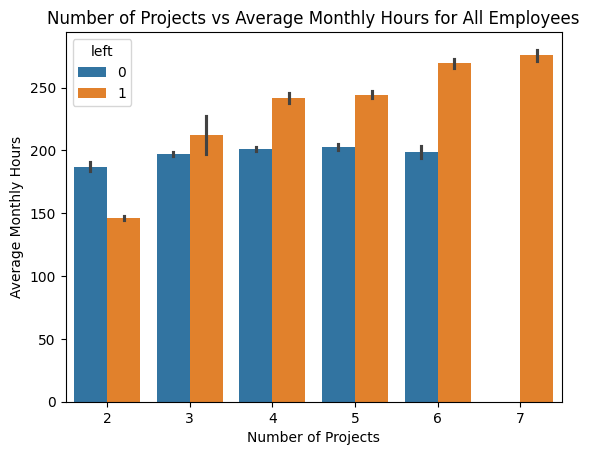

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.barplot(data=df1, x='number_project', y='average_monthly_hours', hue='left')
plt.title("Number of Projects vs Average Monthly Hours for All Employees")
plt.xlabel('Number of Projects')
plt.ylabel('Average Monthly Hours')
plt.show()

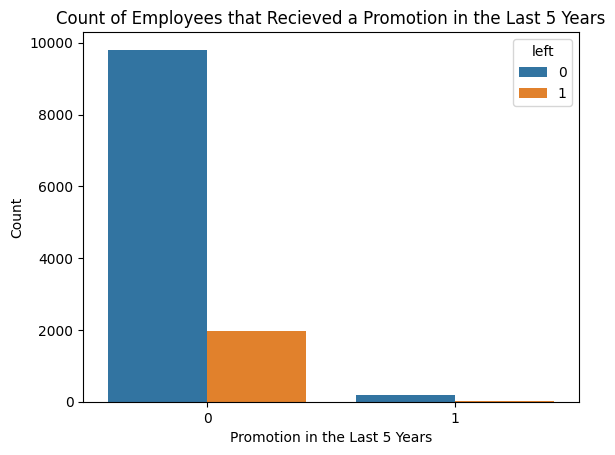

In [22]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.countplot(data=df1, x='promotion_last_5years', hue='left')
plt.title("Count of Employees that Recieved a Promotion in the Last 5 Years")
plt.xlabel('Promotion in the Last 5 Years')
plt.ylabel('Count')
plt.show()

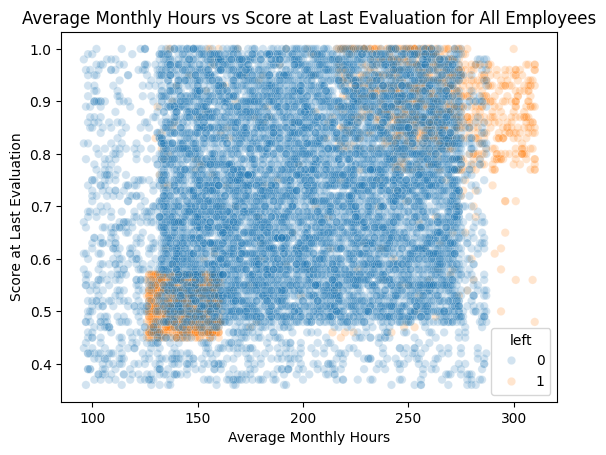

In [23]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.2)
plt.title("Average Monthly Hours vs Score at Last Evaluation for All Employees")
plt.xlabel('Average Monthly Hours')
plt.ylabel('Score at Last Evaluation')
plt.show()

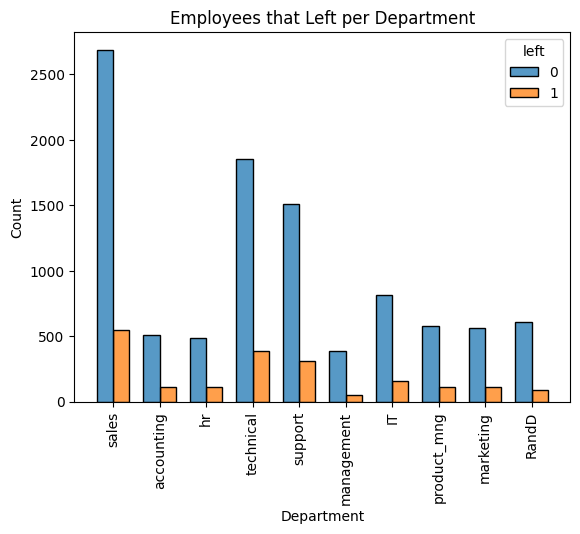

In [24]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(data=df1, x='department', hue='left', multiple='dodge', shrink=0.7)
plt.title('Employees that Left per Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

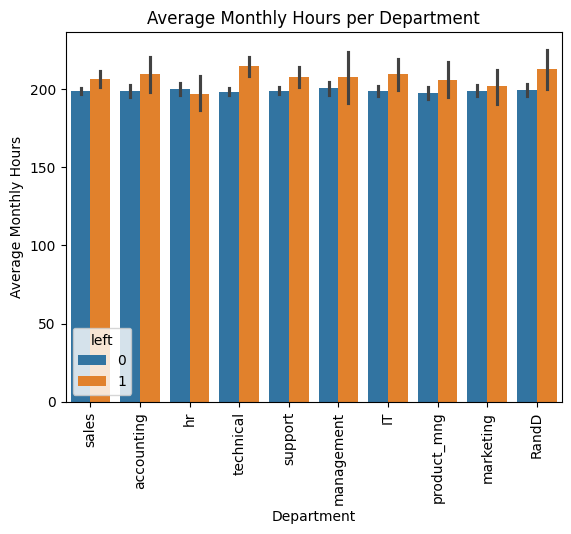

In [25]:
sns.barplot(data=df1, x='department', y='average_monthly_hours', hue='left')
plt.title('Average Monthly Hours per Department')
plt.xlabel('Department')
plt.ylabel('Average Monthly Hours')
plt.xticks(rotation=90)
plt.show()

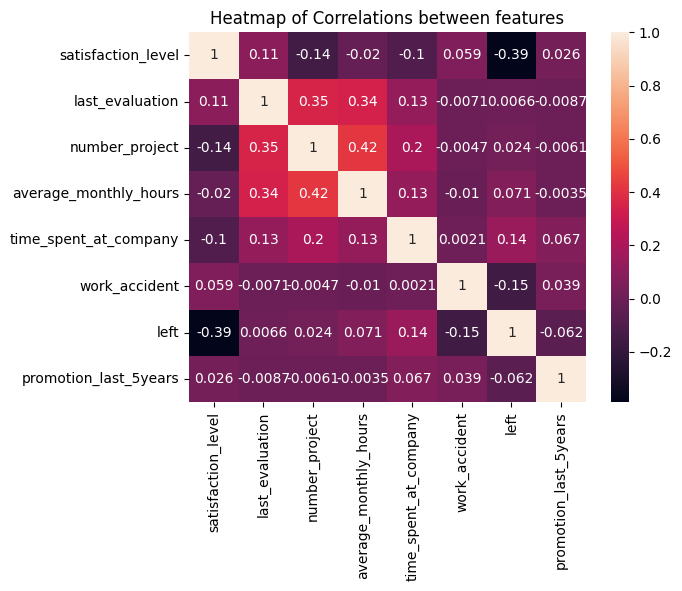

In [42]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.heatmap(df0.drop(columns=['department','salary']).corr(), annot=True)
plt.title('Heatmap of Correlations between features')
plt.show()

### Insights

Employees that leave are mainly atrributed to high working hours and low evaluation scores meaning there is either an issue with scheduling them, making them work more than they need to or by general discontent with working leading to less motivation and lower evaluation scores. Salary does not play much of a part in employees leaving as there is a similar amount leaving at each interval. Most employees that leave come from the sales, tech and support departments meaning that the work there may be too much for people to handle or it is being handled badly. Most departments work similar amount of monthly hours, with people that leave usually being attributed to the ones that work longer.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



1) Logistic Regression performs significantly worse than tree based models.  
2) 'satisfaction_level', 'last_evaluation', 'average_monthly_hours', 'promotion_last_5years', 'department' as they are closely related to reasons why people quit.  
3) Yes each assumption is met.  
4) Logistic Regression achieves around a 71% accuracy on validation data while random forests achieve 93% and xgboost achieves 9x%.  
5) Model might be improved by adding additional features however it could lead to overfitting. One improvement could be to use data that has a better class balance and doesnt need resampling.  
6) Sklearn and XGboost for all models and metrics.  
7) The model cannot be used to fire employees that are about to leave but should serve as an early indicator of if things are going in the wrong direction with a certain employee. All data needed for this should be obtained ethically and with consent. 

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

This is a logistic regression task we are trying to classify between 2 groups.

### Identify the types of models most appropriate for this task.

Both Logistic Regression and Tree based models are both appropriate.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [43]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spent_at_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [44]:
df2 = df1.copy()
majority = df2[df2['left'] == 0]
minority = df2[df2['left'] == 1]

# Resample for class balance
resamp_left = resample(minority, replace=True, n_samples=len(majority), random_state=42)

df3 = pd.concat([majority, resamp_left]).reset_index(drop=True)
df3['left'].value_counts()

left
0    10000
1    10000
Name: count, dtype: int64

In [45]:
X = df3[['satisfaction_level', 'last_evaluation', 'average_monthly_hours', 'promotion_last_5years', 'department']]
X = pd.get_dummies(X, columns=['department'])
X.head()

,satisfaction_level,last_evaluation,average_monthly_hours,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.58,0.74,215,0,False,False,False,False,False,False,False,True,False,False
1,0.82,0.67,202,0,False,False,False,False,False,False,False,True,False,False
2,0.45,0.69,193,0,False,False,False,False,False,False,False,True,False,False
3,0.78,0.82,247,0,False,False,False,False,False,False,False,True,False,False
4,0.49,0.60,214,0,False,False,False,False,False,False,False,True,False,False


In [46]:
X.dtypes

satisfaction_level        float64
last_evaluation           float64
average_monthly_hours       int64
promotion_last_5years       int64
department_IT                bool
department_RandD             bool
department_accounting        bool
department_hr                bool
department_management        bool
department_marketing         bool
department_product_mng       bool
department_sales             bool
department_support           bool
department_technical         bool
dtype: object

In [47]:
y = df3['left']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [49]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((12000, 14), (3000, 14), (5000, 14), (12000,), (3000,), (5000,))

In [50]:
X_train.dtypes

satisfaction_level        float64
last_evaluation           float64
average_monthly_hours       int64
promotion_last_5years       int64
department_IT                bool
department_RandD             bool
department_accounting        bool
department_hr                bool
department_management        bool
department_marketing         bool
department_product_mng       bool
department_sales             bool
department_support           bool
department_technical         bool
dtype: object

In [51]:
### YOUR CODE HERE ###
model_lr = LogisticRegression(solver='lbfgs', random_state=42, max_iter=500)
model_lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [52]:
y_hat = model_lr.predict(X_val)

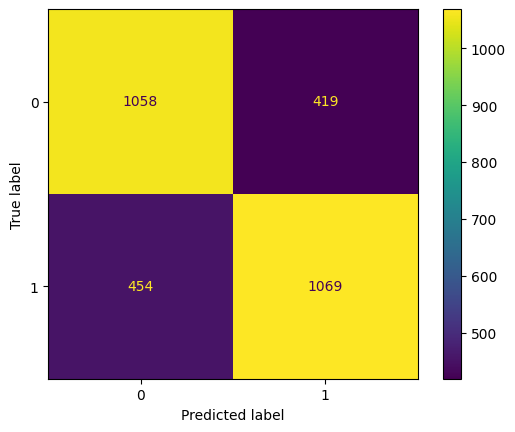

In [53]:
cm = confusion_matrix(y_val, y_hat, labels=model_lr.classes_)
fig = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_lr.classes_)
fig.plot()
plt.show()

In [54]:
labels = ['Left', 'Did not Leave']
print(classification_report(y_val, y_hat, target_names=labels))

               precision    recall  f1-score   support

         Left       0.70      0.72      0.71      1477
Did not Leave       0.72      0.70      0.71      1523

     accuracy                           0.71      3000
    macro avg       0.71      0.71      0.71      3000
 weighted avg       0.71      0.71      0.71      3000



In [55]:
model_rf = RandomForestClassifier(random_state=42)

rf_param = {'max_depth': [3,5,7],
          'max_samples': [0.3, 0.7],
          'min_samples_leaf': [1,2,5],
          'min_samples_split': [2,3,5],
          'n_estimators': [25,50,100]}

score = ['accuracy', 'precision', 'recall', 'f1']

rf_cv = GridSearchCV(model_rf, rf_param, scoring=score, refit='accuracy')

In [56]:
%%time
rf_cv.fit(X_train, y_train)

CPU times: total: 2min 10s
Wall time: 2min 10s


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [3, 5, ...], 'max_samples': [0.3, 0.7], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 3, ...], ...}"
,scoring,"['accuracy', 'precision', ...]"
,n_jobs,None
,refit,'accuracy'
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,25


In [57]:
rf_cv.best_score_

0.9286666666666668

In [58]:
rf_cv.best_estimator_

,n_estimators,25
,criterion,'gini'
,max_depth,7
,min_samples_split,2
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [59]:
rf_y_hat = rf_cv.best_estimator_.predict(X_val)

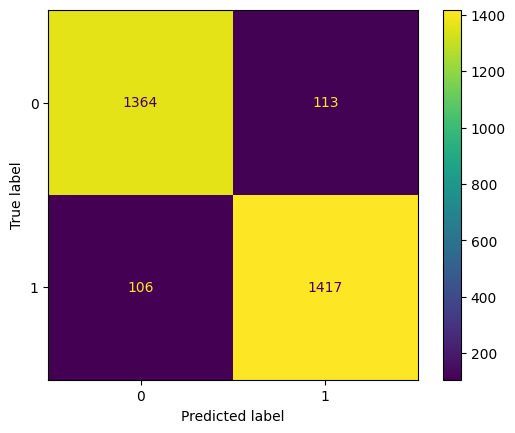

In [60]:
cm = confusion_matrix(y_val, rf_y_hat)
fig2 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
fig2.plot()
plt.show()

In [61]:
print(classification_report(y_val, rf_y_hat, target_names=labels))

               precision    recall  f1-score   support

         Left       0.93      0.92      0.93      1477
Did not Leave       0.93      0.93      0.93      1523

     accuracy                           0.93      3000
    macro avg       0.93      0.93      0.93      3000
 weighted avg       0.93      0.93      0.93      3000



In [ ]:
model_xgb = XGBClassifier(random_state=42)

xgb_param = {'max_depth': [3,5,7],
             'min_child_weight': [1, 3, 5],
             'learning_rate': [0.001, 0.01],
             'n_estimators': [25, 50, 100]
             }

score = ['accuracy', 'precision', 'recall', 'f1']

xgb_cv = GridSearchCV(model_xgb, xgb_param, scoring=score, refit='accuracy')

In [63]:
%%time
xgb_cv.fit(X_train, y_train)

CPU times: total: 1min 41s
Wall time: 10.3 s


,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'learning_rate': [0.001, 0.01], 'max_depth': [3, 5, ...], 'min_child_weight': [1, 3, ...], 'n_estimators': [25, 50]}"
,scoring,"['accuracy', 'precision', ...]"
,n_jobs,None
,refit,'accuracy'
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [64]:
xgb_cv.best_score_

0.9372499999999999

In [65]:
xgb_cv.best_estimator_

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [66]:
xgb_y_hat = rf_cv.best_estimator_.predict(X_val)

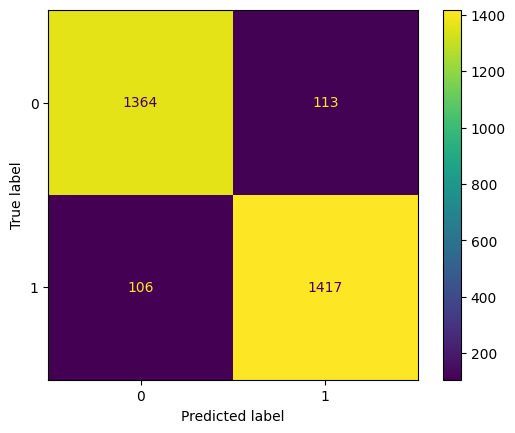

In [67]:
cm = confusion_matrix(y_val, xgb_y_hat)
fig3 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
fig3.plot()
plt.show()

In [71]:
print(classification_report(y_val, xgb_y_hat, target_names=labels))

               precision    recall  f1-score   support

         Left       0.93      0.92      0.93      1477
Did not Leave       0.93      0.93      0.93      1523

     accuracy                           0.93      3000
    macro avg       0.93      0.93      0.93      3000
 weighted avg       0.93      0.93      0.93      3000



In [68]:
model_final = xgb_cv.best_estimator_

y_final = model_final.predict(X_test)

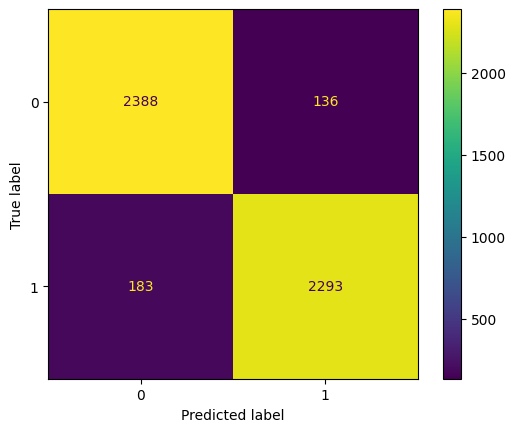

In [69]:
cm = confusion_matrix(y_test, y_final)
fig2 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
fig2.plot()
plt.show()

In [74]:
print(classification_report(y_test, y_final, target_names=labels))

               precision    recall  f1-score   support

         Left       0.93      0.95      0.94      2524
Did not Leave       0.94      0.93      0.93      2476

     accuracy                           0.94      5000
    macro avg       0.94      0.94      0.94      5000
 weighted avg       0.94      0.94      0.94      5000



In [70]:
auc = roc_auc_score(y_test, y_final)
auc

0.936103871332782

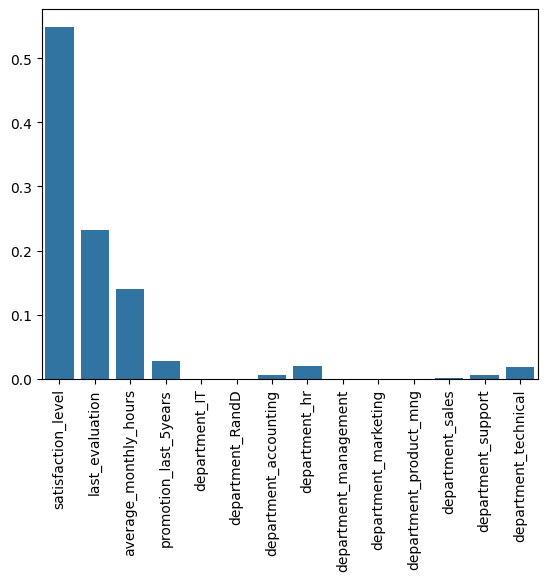

In [76]:
importances = xgb_cv.best_estimator_.feature_importances_
importances_list = pd.Series(importances, index=X_test.columns)

sns.barplot(importances_list)
plt.xticks(rotation=90)
plt.show()

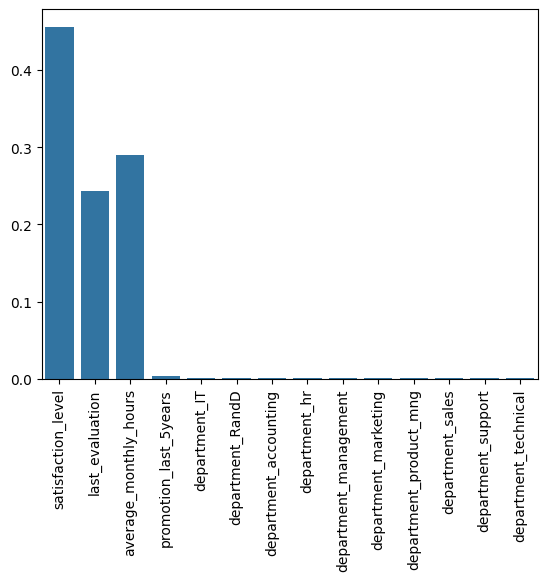

In [77]:
importances = rf_cv.best_estimator_.feature_importances_
importances_list = pd.Series(importances, index=X_test.columns)

sns.barplot(importances_list)
plt.xticks(rotation=90)
plt.show()

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



1) The tree based models can quite accuratley predict if a person will leave or not leave with a 94% accuracy.  
2) Based on both tree based models, leaving is mainly attributed to the employees satisfaction leavel, their evaluation score and the hours that they work. This means the business should keep a close eye on these and if an employee is feeling less satisfied they should recieve some support, or if they have a low evaluation score, a performance meeting could be had to ensure that they can become better and more motivated. The hours theywork should also not be too little or too high.  
3) The XGBoost model should be provided to the company given that it gives more importance to a variety of features and captures the problems in dpecific departments better.  
4) I think the model could still be further improved with additional data or different methods, however I believe the performance is satisfactory for this specific task as the model will be used to guide decisions instead of automate them.  
5) Look into department specific leaving as some have sightly more than others.  
6) Python libaries like Sklearn and XGBoost for modelling the data and seaborn and matplotlib for plotting the results.  
7) The models seem appropriate to use, however they should be used with permission of the employees giving their data and should not be used to treat some employees worse than others as they might be suspected to leave.  

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

Logistic Regression model achieves a 71% accuacy with a 71% f1-score while both tree based models achieve 93% and 94% accuracy for random forest and XGBoost repecively. The tree based models have similar feature importance with XGBoost capturing the slight variations in employees leaving within different departments.  
The XGBoost model can be used for insights into employees leaving.

### Conclusion, Recommendations, Next Steps

The models achieve satisfactory perfromance on unseen data. It is recommended to use the XGBoost model due to its wider range of information used for predictions and slightly higher accuracy.   

The performance should still be monitored and should there be any changes in cmopany workings or departments being created or taken down, the model will need revisions.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.